Student Name: Gerard Kerley
Student ID: 18195229

Task (Complete by Saturday Week 5)

Making use of Numpy, write a Python class to apply the PCA transform to the provided (see Notebook) data set. Compare the output of your implementation to the PCA functionality provided by the Scikitlearn module.

Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.
Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.
Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
Store those results from your fit method that are required to transform the data set, in suitable class properties.
Create a 'transform' method to perform the PCA data transformation on your data set using the parameters obtained using your 'fit' method.
 

N.B.:

Limit your code to the aspects explicitly listed. 
Use the Jupyter Notebook provided in the repository for week 5. This notebook contains the data that needs to be transformed.
The required modules have already been imported for you. You should not import any other modules.
If you find creating a class with this functionality daunting, please start by creating normal functions in your notebook. If time permits, you can then change to use of a class later. 
 

HINTS:

Numpy.mean() will 'flatten' your tensor by default. To obtain the mean along a given axis, you may use the axis parameter.

Numpy.cov() assumes by default that data is presented with one observation per column. This can be changed using the rowvar parameter. 

A Numpy.matrix is a convenient way of performing the matrix operations required for PCA whilst retaining a matrix/vector like structure. Use of this class is discouraged, but would form a good starting point for tackling this week's challenge. Once you have the code working with the matrix class, changing to arrays is relatively straight forward.

You can use Scikitlearn as follows to check the Eigen vectors that you have found with your 'fit' mehod:

pca = PCA(n_components=2)
pca.fit(data)
print(pca.components_)

You can use Scikitlearn to obtain 
GIT push your implementation and post your manual calculations to E-tivity 5: Linear Algebra in Numpy and Beyond and provide the name of your branch.



- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [17]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [18]:
a_x = 0.05
a_y= 10

In [19]:
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [36]:
print (data.shape)
print (data)

(20, 2)
[[ 0.         -2.20685746]
 [ 1.02294355  6.81761128]
 [ 1.9505356  11.25902766]
 [ 3.06546657  9.08055308]
 [ 3.91348872 13.5326669 ]
 [ 4.92997798 15.96803571]
 [ 5.92015605 24.08764665]
 [ 7.09416919 32.96174085]
 [ 8.01223342 35.260778  ]
 [ 9.17655762 38.96615011]
 [ 9.90666607 39.46467087]
 [10.95388064 39.55819248]
 [11.72952612 45.0452084 ]
 [13.21634375 47.79153155]
 [13.65348866 60.99651611]
 [14.89586382 61.80208803]
 [15.99476334 60.54108797]
 [17.27900032 72.44713956]
 [18.21387275 76.20386046]
 [18.78335749 80.77491481]]


### SKLearn PCA
n = 2

In [28]:
pca = PCA(n_components=2)
pca.fit(data)
print(pca.components_)

[[ 0.23917316  0.97097693]
 [ 0.97097693 -0.23917316]]


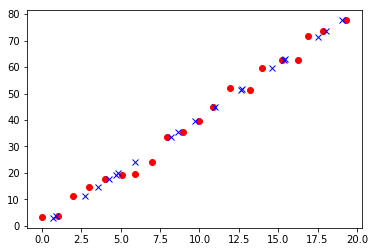

In [29]:
# Reduce dimensions to n = 1
pca = PCA(n_components=1)
pca.fit(data)
data_pca = pca.transform(data)
data_reduced = pca.inverse_transform(data_pca)

# Plot data
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()

### MyPCA implementation

In [31]:
from sklearn.decomposition import PCA
import numpy as np
from numpy.linalg import linalg as nla
import random as rand
import matplotlib.pyplot as plt

a_x = 0.05
a_y= 10

data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

In [50]:
class MyPCA():
    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, data):
        """
        
        """
        # Calculate means
        data_means = np.mean(data.T, axis=1)
        print("data_means")
        print(data_means)
        
        # Center data
        data_centered = data - data_means
        print("data_centered")
        print(data_centered)
        
        # Calculate covariance
        data_covariance = np.cov(data_centered,rowvar=False)
        print("data_covariance")
        print(data_covariance)
        
        # get eigen values and vectors
        eigenvalues, eigenvectors = eig(data_covariance)        
        print("eigenvalues")
        print(eigenvalues)
        print("eigenvectors")
        print(eigenvectors)        

        #sort eigenvalues
        indexes_sorted = eigenvalues.argsort()[::-1]   
        eigenvalues_sorted = eigenvalues[indexes_sorted]
        eigenvectors_sorted = eigenvectors[:,indexes_sorted]
        eigenvectors = eigenvectors_sorted[:, :self.n_components]
        print("eigenvalues")
        print(eigenvalues)
        print("eigenvectors")
        print(eigenvectors)        

        return (eigenvalues, eigenvectors)
        
    
    def transform(self, data):
        """
        
        """
        #TODO: use np.dot to do projection
            

In [51]:
my_pca = MyPCA(2)
my_pca_fit = my_pca.fit(data)
my_pca_transform = my_pca.transform(data)

data_means
[ 9.48561458 38.51762815]
data_centered
[[ -9.48561458 -40.72448561]
 [ -8.46267103 -31.70001687]
 [ -7.53507898 -27.25860049]
 [ -6.42014802 -29.43707507]
 [ -5.57212586 -24.98496125]
 [ -4.55563661 -22.54959244]
 [ -3.56545853 -14.4299815 ]
 [ -2.39144539  -5.5558873 ]
 [ -1.47338116  -3.25685015]
 [ -0.30905696   0.44852196]
 [  0.42105149   0.94704272]
 [  1.46826606   1.04056433]
 [  2.24391154   6.52758025]
 [  3.73072917   9.2739034 ]
 [  4.16787407  22.47888796]
 [  5.41024923  23.28445988]
 [  6.50914876  22.02345982]
 [  7.79338574  33.92951141]
 [  8.72825817  37.68623231]
 [  9.29774291  42.25728666]]
data_covariance
[[ 35.03971677 145.30217663]
 [145.30217663 614.51663297]]
eigenvalues
[6.46879505e-01 6.48909470e+02]
eigenvectors
[[-0.97311157 -0.23033425]
 [ 0.23033425 -0.97311157]]
eigenvalues
[6.46879505e-01 6.48909470e+02]
eigenvectors
[[-0.23033425 -0.97311157]
 [-0.97311157  0.23033425]]


Compare fit method output with sklearn fit